In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

%matplotlib inline

import scipy.stats as stats 
import random

# 1.**Chi-Square Test for Variance**

**Business Problem 1**

*It is estimated that the standard deviation for the annual financial penalties of traffic of China provinces is 12.5% when all such financial penalties are considered and over a long period. The sample standard deviation of a certain province's cities financial penalties based on a random sample of size 32 is observed to be 24.3%.*


*Do we have enough evidence to claim that the standard deviation of the chosen province is greater than the estimated standard deviation for the financial penalties of traffic of China provinces at a 0.05 level of significance?*

Let $\sigma$ be the average standard deviation of the financial penalties.

We will test the null hypothesis

>$H_0:\sigma^2 = 12.5^2$

against the alternate hypothesis

>$H_a:\sigma^2 > 24.3^2$

### Are the assumptions are satisfied or not?

- Continuous data - Yes
- Normally distributed population - Since the sample sizes are greater than 30, Central Limit Theorem states that the distribution of sample means will be normal.
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.   

### Let's find the p-value

In [2]:
from scipy.stats import chi2

def chi_var(pop_var, sample_var, n):
    test_stat = (n - 1) * sample_var / pop_var
    p_value = 1 - chi2.cdf(test_stat, n-1)
    return (test_stat, p_value)

In [3]:
n = 32
sigma_2, s_2 = 12.5**2, 24.3**2

test_stat, p_value = chi_var(sigma_2, s_2, n)

print('The p-value is : {}, the t-test statistic is : {}'.format(str(p_value), str(round(test_stat, 2))))

The p-value is : 6.139422303874653e-12, the t-test statistic is : 117.15


As p-value is much smaller than the level of significance 0.05, we reject the null in favor of the alternative hypothesis. We have enough significant statistical evidence to support our alternative.

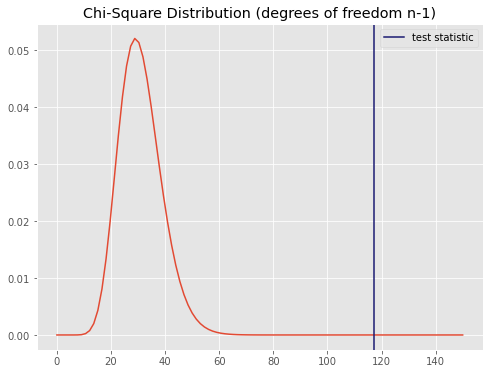

In [5]:
plt.style.use('ggplot')

plt.figure(figsize=(8,6))
x = np.linspace(0, 150, 100)
plt.plot(x, chi2.pdf(x, n-1))
plt.axvline(x = test_stat, c = '#191970', label='test statistic')
plt.title('Chi-Square Distribution (degrees of freedom n-1)')
plt.legend()
plt.show()

### **Conclusion**

- With 95% confidence we conclude that we have enough statistical evidence to say that the AVG standard deviation of the selected province is greater than the AVG standard deviation of China provinces.

# 2. **Chi-Square Test for Independence**

**Business Problem 2**

*We suppose that VOX Cinema had been collecting data about their clients for a while, and they were interested to know if there's a kind of relationship  between the movies' preferences for different marital status.*

*A randomly selected sample of clients movies preference data for different marital status groups is given in the movies_pre.csv file.*


*Do we have enough statistical evidence to conclude that movies preference depends on marital status?*

We will test the null hypothesis

>$H_0:$ Movie preference is independent of marital status.

against the alternate hypothesis

>$H_a:$ Moive preference depends on marital status.

In [6]:
movies_data = pd.read_csv('movies_pref.csv', encoding= 'unicode_escape')
movies_data

,marital_status,drama,thriller,comedy,fantasy,romance,science fiction,adventure,sports,action,horror,musical,mystery
0,single,14,65,98,15,86,25,92,15,82,45,22,31
1,married,9,78,22,52,74,13,69,24,76,20,41,45
2,widowed,6,55,45,43,33,54,10,19,93,35,23,43
3,divorced,21,34,11,24,27,87,37,50,55,19,12,65


### Are the assumptions of the Chi-Square test are satisfied or not?

- Categorical variables - Yes
- The Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

In [7]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(movies_data.drop('marital_status', axis=1))
print('The p-value is', p_value)

The p-value is 1.9405585331324374e-66


As the p-value is much less than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical evidence to conclude that movie preferences is not independent of marital status at a 5% significance level.

### **Conclusion**

- With 95% confidence, we have enough statistical evidence to come up with  that the movie preferences depend on marital status.